# Gojek DS Bootcamp Day 2: Supervised Learning
## Session 2: Classification

In this session, we will see how machine learning can be used to predict categorical things or usually called classification task. We'll start from the basic binary classification, which means, we only want to differentiate between 2 classes, somestimes dubbed as positive or negative class.

We'll start our journey from arguably the simplest classification algorithm, logistic regression, which in different literature will be called single layer neural network. Then we'll work our way to the more complex one, in this case, decision tree.

We'll be more focusing on the more practical side by using library which is scikit-learn.

## Logistic Regression
Logistic regression can be viewed as extension from previously explained linear regression. Where now the output is squeezed through a function so the value output range from 0 to 1 (sigmoid function is one of the most popular choice for this case) and a new loss function that is better suited for classification task.

- Plot sigmoid function.
- Formula for logistic loss

Let's just jump right into it by first importing important libraries that we are going to use all throughout this session.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Test easy dataset for logistic regression, should be easy as it name implies
easy = pd.read_csv('easy_dataset.csv')
easy.head()

,x,y,label
0,-2.866301,0.843183,0
1,-2.139075,1.413951,0
2,-1.537203,1.839824,0
3,-1.720740,1.373550,0
4,-0.518428,0.950258,0


In [3]:
def plot_dataset(df, ax=None):
    
    ax.scatter(x='x', y='y', data=df[df['label'] == 0], color='red')
    ax.scatter(x='x', y='y', data=df[df['label'] == 1], color='green')

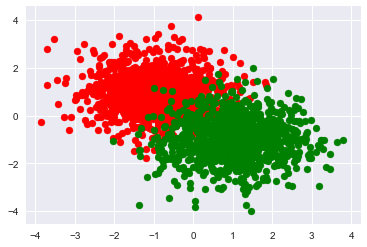

In [4]:
# First things first, when you import and working on new dataset, is to plot it
# especially since the dimensional is low enough
fig, ax = plt.subplots()

plot_dataset(easy, ax)

In [5]:
# Looking at the plot, it should be linearly separable, right up the alley for logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X=easy[['x', 'y']], y=easy['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
prediction = logreg.predict(easy[['x', 'y']])

One metrics that is very popular for classification task is accuracy, which is simply defined as the number of correct prediction divided by the number of all prediction.

- Other metrics

In [7]:
# First, we'll see the training error
from sklearn.metrics import accuracy_score

accuracy_score(easy['label'], prediction)

0.93600000000000005

In [8]:
# Next, let's properly evaluate the performance, by splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(easy[['x', 'y']], easy['label'], random_state=43)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)
accuracy_score(y_test, prediction)

0.93799999999999994

There's slight decrease in accuracy but it is kind of expected. Now let's take a look at the decision boundary.

There's a small detail that we set. This is to ensure that every single time we run the code, we will get the same split. This is because one of the core tenets of science is reproducibility.

In [9]:
def decision_boundary(model, df, ax=None):
    
    max_x = np.max(df['x'])
    max_y = np.max(df['y'])
    
    min_x = np.min(df['x'])
    min_y = np.min(df['y'])
    
    xs = np.linspace(min_x, max_x, 200)
    ys = np.linspace(min_y, max_y, 200)
    zs = np.zeros((200, 200))

    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            zs[j, i] = model.predict(np.array([[x, y]]))[0]

    ax.contour(xs, ys, zs, levels=(-1, 0, 1), linewidths=2, colors='black', alpha=0.5)
    ax.contourf(xs, ys, zs, levels=(-1, 0, 1), colors=('#ff0000', '#00ff00'), alpha=0.2)

    ax.scatter(x='x', y='y', data=df[df['label'] == 0], color='red')
    ax.scatter(x='x', y='y', data=df[df['label'] == 1], color='green')
    
    ax.set_xlim((min_x, max_x))
    ax.set_ylim((min_y, max_y))

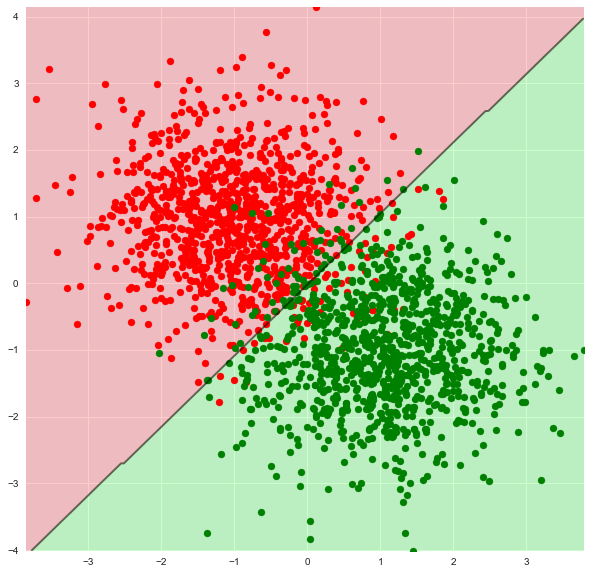

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

decision_boundary(logreg, easy, ax)

Given by how this dataset is populated in the first place, this is as close as we can to optimal way to divide the data into their respective classes. Now, let's try a harder problem and see if logistic regression is still up to the task.

In [11]:
medium = pd.read_csv('medium_dataset.csv')
medium.head()

,x,y,label
0,0.471969,0.290023,0
1,-0.647295,-0.637178,0
2,-0.551973,-1.019000,0
3,-0.150224,0.636008,0
4,-0.335839,0.642716,0


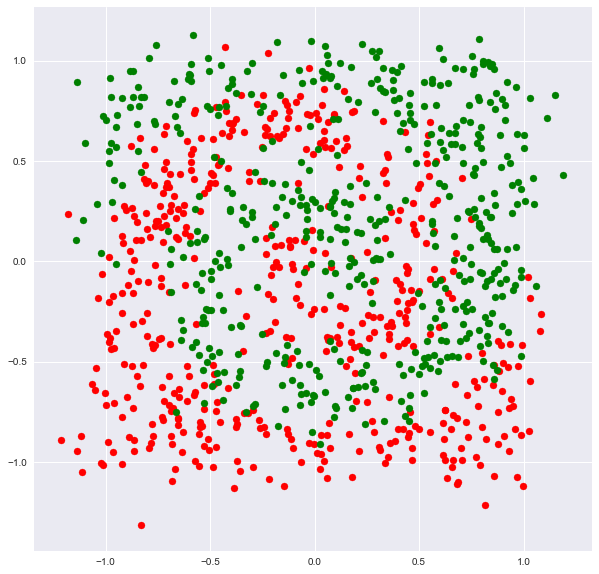

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_dataset(medium, ax)

In [13]:
# This should be interesting
logreg2 = LogisticRegression()
logreg2.fit(X=medium[['x', 'y']], y=medium['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
prediction = logreg2.predict(medium[['x', 'y']])
accuracy_score(medium['label'], prediction)

0.67000000000000004

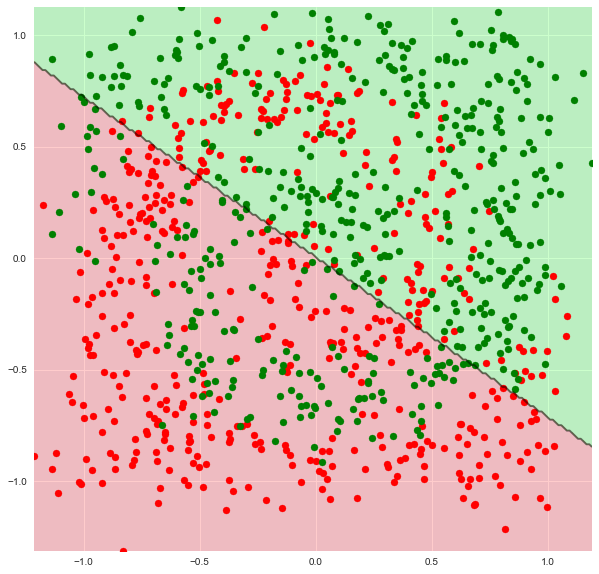

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

decision_boundary(logreg2, medium, ax)

From the plot and decision boundary, we know that it cannot be separated linearly. However, we can explicitly transform our original data into higher dimensionsional space. Therefore, when we project it back, it can have non-linear decision boundary.

In [16]:
def transform(df):
    
    transformed = df.copy(deep=True)
    transformed['xx'] = transformed['x']*transformed['x']
    transformed['yy'] = transformed['y']*transformed['y']
    transformed['xy'] = transformed['x']*transformed['y']
    transformed['xxx'] = transformed['x']*transformed['x']*transformed['x']
    
    return transformed

In [17]:
transformed = transform(medium)

In [18]:
logreg2.fit(X=transformed[['x', 'y', 'xx', 'yy', 'xy']], y=transformed['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

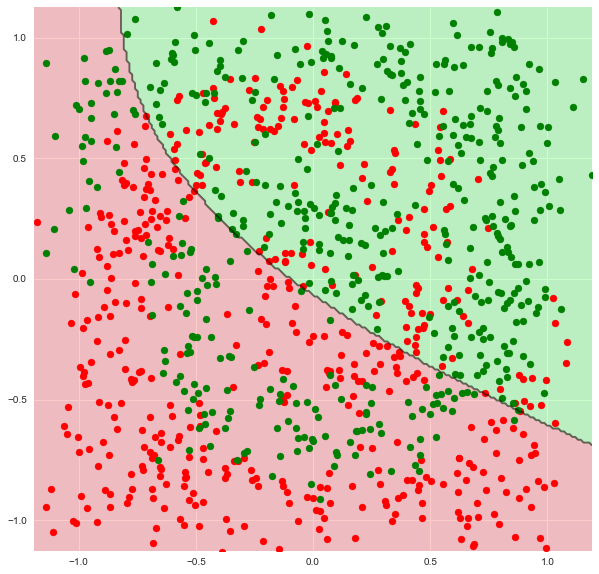

In [19]:
def decision_boundary2(model, df):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    max_x = np.max(df['x'])
    max_y = np.max(df['y'])
    
    xs = np.linspace(-max_x, max_x, 200)
    ys = np.linspace(-max_x, max_y, 200)
    zs = np.zeros((200, 200))

    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            zs[j, i] = model.predict(np.array([[x, y, x*x, y*y, x*y]]))[0]

    ax.contour(xs, ys, zs, levels=(-1, 0, 1), linewidths=2, colors='black', alpha=0.5)
    ax.contourf(xs, ys, zs, levels=(-1, 0, 1), colors=('#ff0000', '#00ff00'), alpha=0.2)

    ax.scatter(x='x', y='y', data=df[df['label'] == 0], color='red')
    ax.scatter(x='x', y='y', data=df[df['label'] == 1], color='green')
    
    ax.set_xlim((-max_x, max_x))
    ax.set_ylim((-max_y, max_y))

decision_boundary2(logreg2, transformed)

We'll see that by transforming into higher dimension, we can have non-linear decision boundary in the original space. However, the transformation have to be tailored into each different specific dataset. Also the resulting model is less interpretable compare to original data. We will see how more complex algorithm such as multi layer neural network or decision tree can have 

Logistic Regression has hyperparameter, which decide and usually also problem dependent.

- Logistic regression hyperparam

This regularization factor is more prominent when we have large number of features.

## Decision Tree
In this part we will take a look a more complex model in the form of decision tree. Decision Tree works by partitioning the data in the feature space recursively by. (In the other parts of the world, you might have heard be called recursive partitioning). In the end, if we traverse the tree from the root until the leaf. This rule can be seen. We'll discuss how decision tree decide how to.

### A quick detour into information theory, entropy and information gain
In physics, entropy is a measure of chaos, and immortalized in the second law of thermodynamic. However, in information theory, entropy is measurement of uncertainty. The more uncertain we are, the higher the entropy. It is formalized in the formula as

\begin{equation}
\sum^i -p_i  log_2  p_i
\end{equation}

Using entropy, we can have our first criterion for splitting, which is information gain. It is formulated by the reduce in entropy before and after a split in the one of the feature in the dataset happens.


Let's jump right into it, and try to run decision tree on the medium dataset

In [20]:
from sklearn.tree import DecisionTreeClassifier

dec = DecisionTreeClassifier(criterion='entropy')
dec.fit(X=medium[['x', 'y']], y=medium['label'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [21]:
pred = dec.predict(medium[['x', 'y']])
accuracy_score(medium['label'], pred)

1.0

Wow, perfect accuracy. Did we just solve machine learning? Let's take a look at produced decision boundary

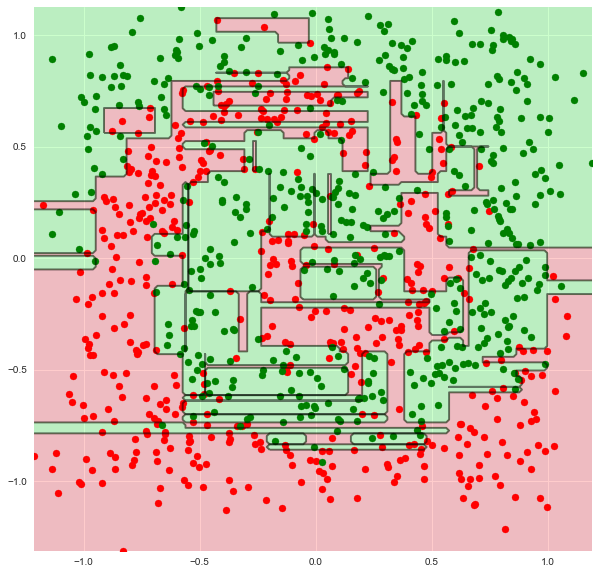

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

decision_boundary(dec, medium, ax)

This is one example of overfitting. However, it is good practice to see if you algorithm can overfit or not (especially for high capacity model) to the training dataset. If not, then there's might be something wrong with the implementation.

Now, let's properly assess the performance by once again splitting it into training and testing dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(medium[['x', 'y']], medium['label'], random_state=43)

logreg = DecisionTreeClassifier(criterion='entropy')
logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)
accuracy_score(y_test, prediction)

0.81599999999999995

That's a more realistic number. Can we improve it further by optimizing for hyperparameter?

Next, we are going to see the effect of various hyperparameter to the output decision boundary. And also to the performance.

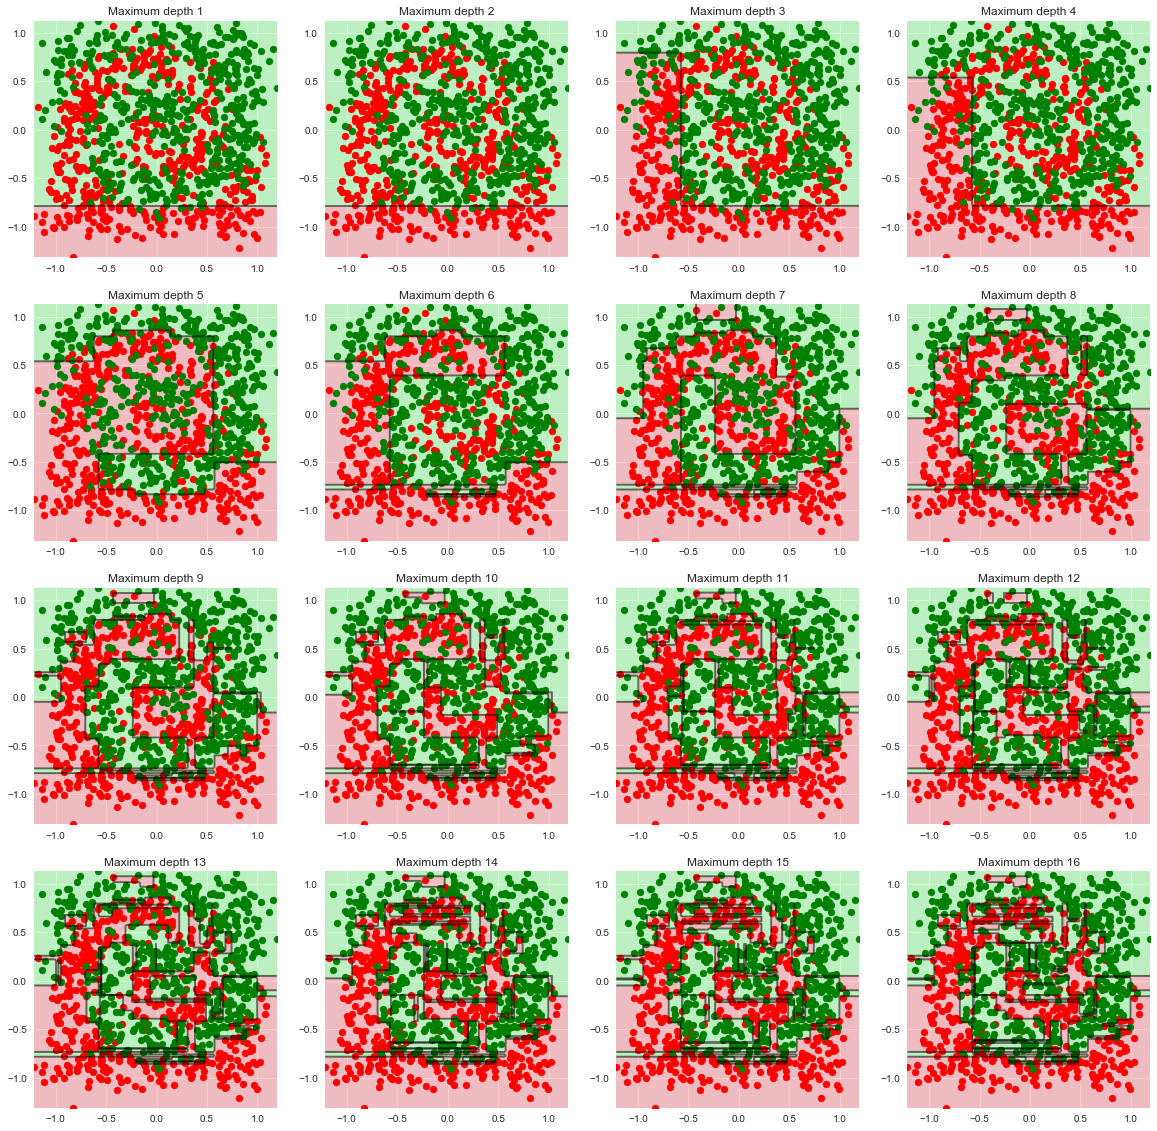

In [24]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i in range(16):
    dec = DecisionTreeClassifier(max_depth=i+1, criterion='entropy')
    dec.fit(X=medium[['x', 'y']], y=medium['label'])
    
    ax = axes.reshape(-1)[i]
    decision_boundary(dec, medium, ax=ax)
    ax.set_title('Maximum depth '+str(i+1))

That's how decision tree works, with its strength and weaknesses. Next session we'll how to extend it to overcome some of the weakness to become even better classifier using ensemble technique. Stay tuned!

### Exercise
In this exercise session, you will be using all the techniques that you are already learned, and then apply it real world dataset.

We will be using Adult dataset from UCI machine learning repository. Download them here: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

- Perform some preprocessing to the data if necessary.
- Test different value of hyperparameter to get the best performance.